# Signal resampling using a causal polyphase filter

Polyphase decimation is an efficient approach to decimation filter implementation, which avoids excess calculations that are disregarded during decimation:

- *Non-polyphase implementation of a decimator with anti-aliasing filter $H(z)$:*

![Alt text](./decimation_schema.png)

- *Non-polyphase representation of $H(z)$:*

![Alt text](./decimation_schema_direct_implementation.png)

- *Efficient polyphase representation of $H(z)$:*

![Alt text](./polyphase_schema.png)

Reza Sameni, 2025

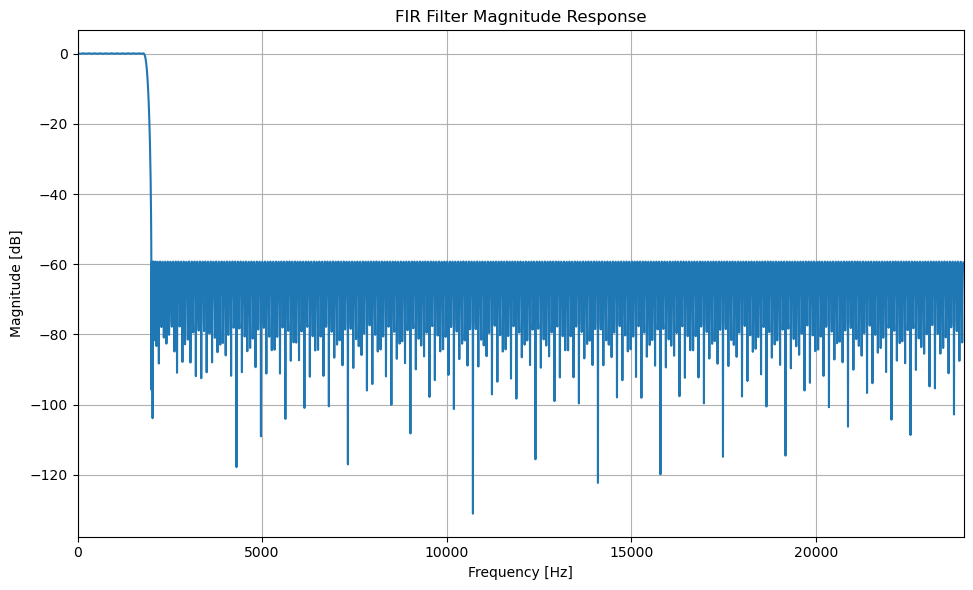

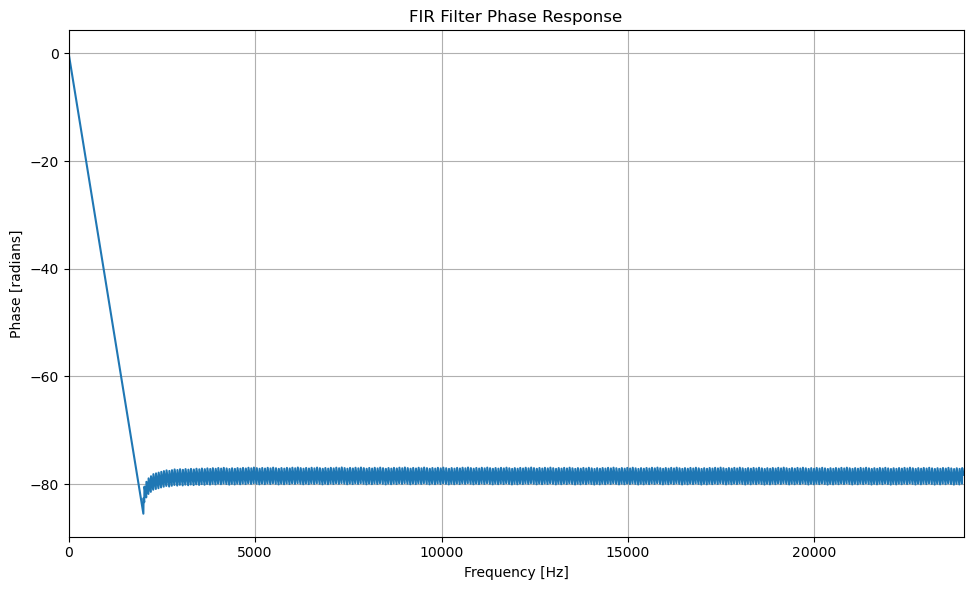

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

fs = 48000.0

antialiasing_48K_coefficient = [
    -0.000528918036421,3.905917945329e-05,5.155717628997e-05, 7.20459085512e-05,
    9.927824130789e-05,0.0001317440764452,0.0001676707784537,0.0002050842330241,
    0.000241872903212,0.0002758808208721,0.0003050038504652,0.0003272998718672,
    0.0003410952702454,0.0003450881165882,0.0003384341621012,0.0003208151482794,
    0.0002924807849818,0.0002542634952921,0.0002075599194656,0.0001542798118794,
    9.676204959868e-05,3.766230755631e-05,-2.018333771016e-05,-7.391204196104e-05,
    -0.0001207966043423,-0.000158407061391,-0.0001847603289176,-0.0001984495362152,
    -0.0001987429410089,-0.0001856471448654,-0.000159926217698,-0.0001230777012674,
    -7.726257172766e-05,-2.519887158715e-05,2.998235616846e-05,8.490372309274e-05,
    0.000136134441655,0.0001803827478773,0.0002146995369905, 0.000236649623434,
    0.0002446748604919,0.0002368026473277,0.0002152571643415,0.0001793181783059,
    0.0001311187964488,7.336386158741e-05,9.361788615376e-06,-5.712632300891e-05,
    -0.0001220750851663,-0.0001814361760532,-0.0002313814628164,-0.0002685501580072,
    -0.0002902678289126,-0.0002947330497056,-0.0002811520319986,-0.0002498189721905,
    -0.0002021303496634,-0.0001405334991939,-6.84068953659e-05,1.011965761907e-05,
    9.039728898886e-05, 0.000167528781281,0.0002366637906584,0.0002933004668104,
    0.0003335746744016,0.0003545181516929,0.0003542681943243,0.0003322155787304,
    0.0002890782085376,0.0002268952448782,0.0001489376702864,5.954255120383e-05,
    -3.612386179594e-05,-0.0001323572461768,-0.0002232516122622,-0.0003030548952484,
    -0.0003665319166977,-0.0004092984723216,-0.0004281240807433,-0.0004211589289803,
    -0.0003881206175159,-0.0003301974017572,-0.0002506531418853,-0.0001531765896029,
    -4.358973443244e-05,7.171400342935e-05, 0.000185817964585,0.0002916819949762,
    0.0003825601871029,0.0004524429034467,0.0004964455770861,0.0005111468946745,
    0.0004948358294456,0.0004476655496911,0.0003716931996672,0.0002708075218629,
    0.0001505383680483,1.776117385942e-05,-0.0001196915745904,-0.0002534867388617,
    -0.0003752911789207,-0.0004772856304137,-0.0005526618723373,-0.0005960704265162,
    -0.0006039898251294,-0.0005749924682741,-0.0005098879723436,-0.0004117324923925,
    -0.0002856985872399,-0.0001388117195013,2.043509316289e-05,0.0001825648468825,
    0.0003376750119576,0.0004760354370638,0.0005886953574386,0.0006680547872083,
    0.0007083713336593,0.0007061587065953,0.0006604652585611,0.0005729916717904,
    0.0004480650340611,0.0002923957235014,0.0001148685657048,-7.43759980426e-05,
    -0.0002637281046877,-0.0004416332060088,-0.0005968666049994,-0.0007193041539117,
    -0.0008005755847811,-0.0008346471660783,-0.0008182411915249,-0.0007511101410366,
    -0.0006361216152067,-0.0004791626510588,-0.000288850791189,-7.60731548495e-05,
    0.0001466301000918,0.0003657969075742,0.0005678508365918,0.0007399337414427,
    0.0008707165074574,0.0009511350205829,0.0009750052456563,0.0009394747074433,
    0.0008452796202649,0.0006967870694256,0.0005018144895752,0.0002712322053547,
    1.836755536432e-05,-0.0002417558411295,-0.0004933022784237,-0.0007205785595358,
    -0.0009090054652269,-0.001046042965425,-0.001122014333372,-0.001130769493041,
    -0.001070150321956,-0.0009422166022492,-0.0007532250311059,-0.0005133392431978,
    -0.0002361040804736,6.232439668082e-05,0.0003640602894686,0.0006506818293229,
    0.0009040282615116, 0.001107837526645, 0.001248344969444, 0.001315374970033,
    0.001303032821374, 0.001210184847631, 0.001040620398473,0.0008029434058418,
    0.0005101536863844, 0.000178957501313,-0.0001711747859403,-0.0005191396699341,
    -0.0008434628120752,-0.001123610307551,-0.001341275651566,-0.001481558990805,
    -0.001533967081701,-0.001493164523591,-0.001359425910952,-0.001138752675275,
    -0.0008426412453896,-0.0004875077282835,-9.379624391189e-05,0.0003151819115218,
    0.0007146135028182, 0.001079672991376, 0.001387049763766, 0.001616418659306,
    0.001751764075807, 0.001782468784178, 0.001704098225166, 0.001518820803608,
    0.001235436679407,0.0008689963537764,0.0004400311798359,-2.657999505052e-05,
    -0.000503028545507,-0.0009602216197217,-0.001369515537631, -0.00170454269291,
    -0.001942763799178,-0.002067211258637,-0.002067312176741,-0.001939962747642,
    -0.001689814137768,-0.001329197627996,-0.0008775356133156,-0.0003603439534614,
    0.0001921872787848,0.0007469253738122, 0.001269760741908,  0.00172767511243,
    0.002090798838241,  0.00233432333899,  0.00244015569731, 0.002398202001812,
    0.002207194815967, 0.001874998741839, 0.001418365344504,0.0008621368917777,
    0.0002379349187932,-0.0004176012033038, -0.00106492929794,-0.001663952966211,
    -0.00217646629368,-0.002568547603272,  -0.0028127560033,-0.002889989625524,
    -0.002790884377442,-0.002516652953406,-0.002079301972403,-0.001501194064802,
    -0.0008139686377666,-5.686207942503e-05,0.0007254791904009, 0.001485583250706,
    0.002175973203201, 0.002752078485793, 0.003175035883518, 0.003414262944118,
    0.003449515699491, 0.003272548577782, 0.002887750786239, 0.002312526735273,
    0.001576449193496,0.0007198804937488,-0.0002081862206222,-0.001152825812631,
    -0.002056362351875, -0.00286179803038,-0.003516317479254,-0.003974638380406,
    -0.004202017154894,-0.004176708124363,-0.003891718517857,-0.003355723838891,
    -0.002593066656311,-0.001642806193776,-0.0005568490383667,0.0006027596782751,
    0.001767248671355, 0.002865057220549, 0.003826076866826, 0.004585955107583,
    0.005090206277058, 0.005297877844955, 0.005184538746757,  0.00474438657577,
    0.003991318788862, 0.002958865798581, 0.001698951783598,0.0002795094097108,
    -0.001218950197346,-0.002707655249393,-0.004094551178208,-0.005289679970538,
    -0.006210651149997,-0.006787905923322,-0.006969439330819,-0.006724716357188,
    -0.006047454144726,-0.004957199294468,-0.003499306823782,-0.001743738039227,
    0.000218049143233, 0.002277235366231,   0.0043131526832, 0.006199660085346,
    0.007812199291031, 0.009035079228314,  0.00976864530169, 0.009935911618439,
    0.009488291624448, 0.008410064952551,  0.00672129642824, 0.004478979685198,
    0.001776279558605,-0.001260167403044,-0.004474826386672,-0.007689550708518,
    -0.01071131946951, -0.01334108486355, -0.01538331690218,  -0.0166557883949,
    -0.01699911673097, -0.01628557832314, -0.01442673574011, -0.01137946509183,
    -0.007150044036003,-0.001796046625867, 0.004574102167192,  0.01180395195772,
    0.01969414821299,  0.02800965790094,  0.03648879193782,  0.04485363866789,
    0.05282143278994,  0.06011635305402,  0.06648118520518,  0.07168832735824,
    0.07554958246219,   0.0779243545664,  0.07872572343143,   0.0779243545664,
    0.07554958246219,  0.07168832735824,  0.06648118520518,  0.06011635305402,
    0.05282143278994,  0.04485363866789,  0.03648879193782,  0.02800965790094,
    0.01969414821299,  0.01180395195772, 0.004574102167192,-0.001796046625867,
    -0.007150044036003, -0.01137946509183, -0.01442673574011, -0.01628557832314,
    -0.01699911673097,  -0.0166557883949, -0.01538331690218, -0.01334108486355,
    -0.01071131946951,-0.007689550708518,-0.004474826386672,-0.001260167403044,
    0.001776279558605, 0.004478979685198,  0.00672129642824, 0.008410064952551,
    0.009488291624448, 0.009935911618439,  0.00976864530169, 0.009035079228314,
    0.007812199291031, 0.006199660085346,   0.0043131526832, 0.002277235366231,
    0.000218049143233,-0.001743738039227,-0.003499306823782,-0.004957199294468,
    -0.006047454144726,-0.006724716357188,-0.006969439330819,-0.006787905923322,
    -0.006210651149997,-0.005289679970538,-0.004094551178208,-0.002707655249393,
    -0.001218950197346,0.0002795094097108, 0.001698951783598, 0.002958865798581,
    0.003991318788862,  0.00474438657577, 0.005184538746757, 0.005297877844955,
    0.005090206277058, 0.004585955107583, 0.003826076866826, 0.002865057220549,
    0.001767248671355,0.0006027596782751,-0.0005568490383667,-0.001642806193776,
    -0.002593066656311,-0.003355723838891,-0.003891718517857,-0.004176708124363,
    -0.004202017154894,-0.003974638380406,-0.003516317479254, -0.00286179803038,
    -0.002056362351875,-0.001152825812631,-0.0002081862206222,0.0007198804937488,
    0.001576449193496, 0.002312526735273, 0.002887750786239, 0.003272548577782,
    0.003449515699491, 0.003414262944118, 0.003175035883518, 0.002752078485793,
    0.002175973203201, 0.001485583250706,0.0007254791904009,-5.686207942503e-05,
    -0.0008139686377666,-0.001501194064802,-0.002079301972403,-0.002516652953406,
    -0.002790884377442,-0.002889989625524,  -0.0028127560033,-0.002568547603272,
    -0.00217646629368,-0.001663952966211, -0.00106492929794,-0.0004176012033038,
    0.0002379349187932,0.0008621368917777, 0.001418365344504, 0.001874998741839,
    0.002207194815967, 0.002398202001812,  0.00244015569731,  0.00233432333899,
    0.002090798838241,  0.00172767511243, 0.001269760741908,0.0007469253738122,
    0.0001921872787848,-0.0003603439534614,-0.0008775356133156,-0.001329197627996,
    -0.001689814137768,-0.001939962747642,-0.002067312176741,-0.002067211258637,
    -0.001942763799178, -0.00170454269291,-0.001369515537631,-0.0009602216197217,
    -0.000503028545507,-2.657999505052e-05,0.0004400311798359,0.0008689963537764,
    0.001235436679407, 0.001518820803608, 0.001704098225166, 0.001782468784178,
    0.001751764075807, 0.001616418659306, 0.001387049763766, 0.001079672991376,
    0.0007146135028182,0.0003151819115218,-9.379624391189e-05,-0.0004875077282835,
    -0.0008426412453896,-0.001138752675275,-0.001359425910952,-0.001493164523591,
    -0.001533967081701,-0.001481558990805,-0.001341275651566,-0.001123610307551,
    -0.0008434628120752,-0.0005191396699341,-0.0001711747859403, 0.000178957501313,
    0.0005101536863844,0.0008029434058418, 0.001040620398473, 0.001210184847631,
    0.001303032821374, 0.001315374970033, 0.001248344969444, 0.001107837526645,
    0.0009040282615116,0.0006506818293229,0.0003640602894686,6.232439668082e-05,
    -0.0002361040804736,-0.0005133392431978,-0.0007532250311059,-0.0009422166022492,
    -0.001070150321956,-0.001130769493041,-0.001122014333372,-0.001046042965425,
    -0.0009090054652269,-0.0007205785595358,-0.0004933022784237,-0.0002417558411295,
    1.836755536432e-05,0.0002712322053547,0.0005018144895752,0.0006967870694256,
    0.0008452796202649,0.0009394747074433,0.0009750052456563,0.0009511350205829,
    0.0008707165074574,0.0007399337414427,0.0005678508365918,0.0003657969075742,
    0.0001466301000918,-7.60731548495e-05,-0.000288850791189,-0.0004791626510588,
    -0.0006361216152067,-0.0007511101410366,-0.0008182411915249,-0.0008346471660783,
    -0.0008005755847811,-0.0007193041539117,-0.0005968666049994,-0.0004416332060088,
    -0.0002637281046877,-7.43759980426e-05,0.0001148685657048,0.0002923957235014,
    0.0004480650340611,0.0005729916717904,0.0006604652585611,0.0007061587065953,
    0.0007083713336593,0.0006680547872083,0.0005886953574386,0.0004760354370638,
    0.0003376750119576,0.0001825648468825,2.043509316289e-05,-0.0001388117195013,
    -0.0002856985872399,-0.0004117324923925,-0.0005098879723436,-0.0005749924682741,
    -0.0006039898251294,-0.0005960704265162,-0.0005526618723373,-0.0004772856304137,
    -0.0003752911789207,-0.0002534867388617,-0.0001196915745904,1.776117385942e-05,
    0.0001505383680483,0.0002708075218629,0.0003716931996672,0.0004476655496911,
    0.0004948358294456,0.0005111468946745,0.0004964455770861,0.0004524429034467,
    0.0003825601871029,0.0002916819949762, 0.000185817964585,7.171400342935e-05,
    -4.358973443244e-05,-0.0001531765896029,-0.0002506531418853,-0.0003301974017572,
    -0.0003881206175159,-0.0004211589289803,-0.0004281240807433,-0.0004092984723216,
    -0.0003665319166977,-0.0003030548952484,-0.0002232516122622,-0.0001323572461768,
    -3.612386179594e-05,5.954255120383e-05,0.0001489376702864,0.0002268952448782,
    0.0002890782085376,0.0003322155787304,0.0003542681943243,0.0003545181516929,
    0.0003335746744016,0.0002933004668104,0.0002366637906584, 0.000167528781281,
    9.039728898886e-05,1.011965761907e-05,-6.84068953659e-05,-0.0001405334991939,
    -0.0002021303496634,-0.0002498189721905,-0.0002811520319986,-0.0002947330497056,
    -0.0002902678289126,-0.0002685501580072,-0.0002313814628164,-0.0001814361760532,
    -0.0001220750851663,-5.712632300891e-05,9.361788615376e-06,7.336386158741e-05,
    0.0001311187964488,0.0001793181783059,0.0002152571643415,0.0002368026473277,
    0.0002446748604919, 0.000236649623434,0.0002146995369905,0.0001803827478773,
    0.000136134441655,8.490372309274e-05,2.998235616846e-05,-2.519887158715e-05,
    -7.726257172766e-05,-0.0001230777012674,-0.000159926217698,-0.0001856471448654,
    -0.0001987429410089,-0.0001984495362152,-0.0001847603289176,-0.000158407061391,
    -0.0001207966043423,-7.391204196104e-05,-2.018333771016e-05,3.766230755631e-05,
    9.676204959868e-05,0.0001542798118794,0.0002075599194656,0.0002542634952921,
    0.0002924807849818,0.0003208151482794,0.0003384341621012,0.0003450881165882,
    0.0003410952702454,0.0003272998718672,0.0003050038504652,0.0002758808208721,
    0.000241872903212,0.0002050842330241,0.0001676707784537,0.0001317440764452,
    9.927824130789e-05, 7.20459085512e-05,5.155717628997e-05,3.905917945329e-05,
    -0.000528918036421
]

# Compute frequency response
w, h = freqz(antialiasing_48K_coefficient, worN=4096)

# Convert from rad/sample to Hz
freqs = fs * w / (2 * np.pi)

# Magnitude response (dB)
plt.figure(figsize=(10, 6))
plt.plot(freqs, 20 * np.log10(np.abs(h)))
plt.title("FIR Filter Magnitude Response")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid()
plt.tight_layout()
plt.xlim([0, fs/2])
plt.show()

# Phase response
plt.figure(figsize=(10, 6))
plt.plot(freqs, np.unwrap(np.angle(h)))
plt.title("FIR Filter Phase Response")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [radians]")
plt.grid()
plt.tight_layout()
plt.xlim([0, fs/2])
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(x, fs, label, color):
    N = len(x)
    win = np.hanning(N)
    X = np.fft.rfft(x * win)
    f = np.fft.rfftfreq(N, d=1/fs)

    # Normalize for window power (so total power matches Parseval’s theorem)
    U = (win**2).sum()
    psd = (np.abs(X)**2) / (fs * U)

    plt.plot(f, 10*np.log10(psd + 1e-20), label=label, linewidth=1.0, color=color)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density (dB/Hz)")
    plt.grid(True)

## Example 1

Comparing direct and segment-wise filter implementations

‖resampled_single - resampled_direct‖₂ = 2.255407e-14
‖resampled_multi - resampled_direct‖₂ = 2.255407e-14
‖resampled_multi - resampled_single‖₂ = 0.000000e+00


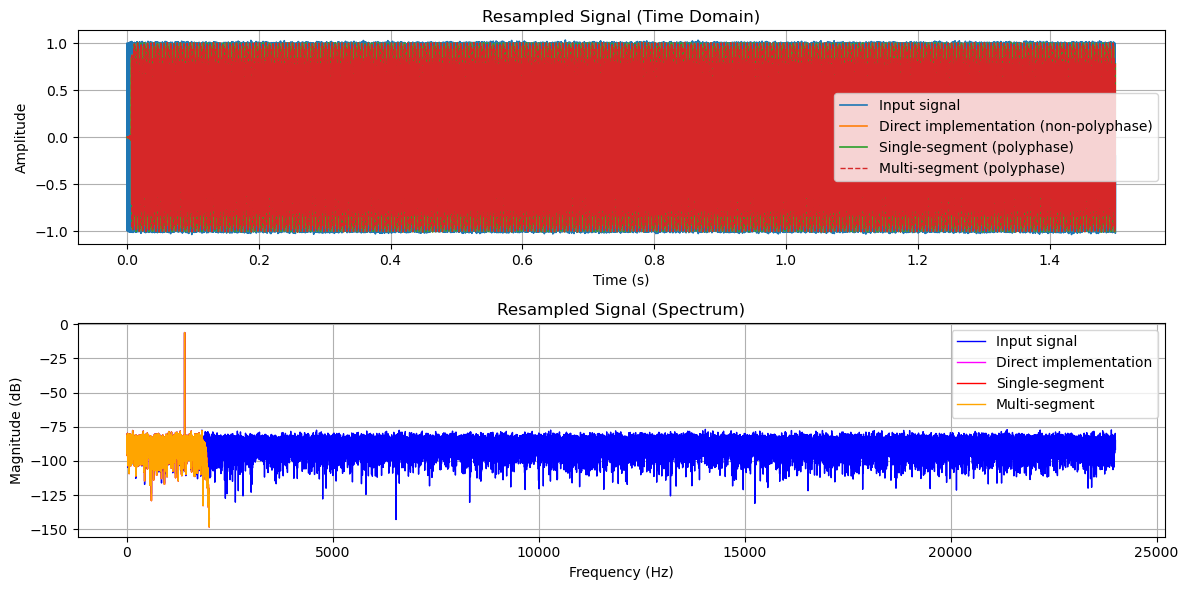

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from polyphase_decimate_causal import polyphase_decimate_causal

# Sampling parameters
f0 = 1400.0                # Signal frequency
T = 1.5                 # Total signal duration in seconds
T1, T2 = 1.0, 2.0       # Block split times
decim_rate = 12         # Downsampling factor
fs_out = fs // decim_rate

# Derived sample counts
N = int(np.round(T * fs))
N1 = int(np.round(T1 * fs))
N2 = int(np.round(T2 * fs))

# Generate test signal: sine wave + noise. Noise is only added for visulization of the spectra
signal = np.sin(2 * np.pi * f0 / fs * np.arange(N)) + 1e-2*np.random.randn(N)

# Single-segment direct implementation
resampled_direct = lfilter(antialiasing_48K_coefficient, [1.0], signal.astype(float))     # causal FIR
resampled_direct = resampled_direct[::decim_rate]

# Single-segment resampling
resampled_single, _ = polyphase_decimate_causal(
    in_sig=signal, dec_filter_h=antialiasing_48K_coefficient, dec_rate=decim_rate
)

# Multi-segment resampling (blockwise)
resampled1, state1 = polyphase_decimate_causal(
    in_sig=signal[:N1], dec_filter_h=antialiasing_48K_coefficient, dec_rate=decim_rate
)
resampled2, state2 = polyphase_decimate_causal(
    in_sig=signal[N1:N2], dec_filter_h=antialiasing_48K_coefficient, dec_rate=decim_rate, init_cond=state1
)
resampled3, _ = polyphase_decimate_causal(
    in_sig=signal[N2:], dec_filter_h=antialiasing_48K_coefficient, dec_rate=decim_rate, init_cond=state2
)
resampled_multi = np.concatenate([resampled1, resampled2, resampled3])

# Calculate error between the two implementations
L = min(len(resampled_single), len(resampled_direct))
error = resampled_single[:L] - resampled_direct[:L]
error_norm = np.linalg.norm(error)
print(f"‖resampled_single - resampled_direct‖₂ = {error_norm:.6e}")

L = min(len(resampled_multi), len(resampled_direct))
error = resampled_multi[:L] - resampled_direct[:L]
error_norm = np.linalg.norm(error)
print(f"‖resampled_multi - resampled_direct‖₂ = {error_norm:.6e}")

L = min(len(resampled_multi), len(resampled_single))
error = resampled_multi[:L] - resampled_single[:L]
error_norm = np.linalg.norm(error)
print(f"‖resampled_multi - resampled_single‖₂ = {error_norm:.6e}")


# Plotting

# Time axes
t_in = np.arange(N) / fs
t_out_direct = np.arange(len(resampled_direct)) / fs_out
t_out_single = np.arange(len(resampled_single)) / fs_out
t_out_multi = np.arange(len(resampled_multi)) / fs_out

plt.figure(figsize=(12, 6))

# Time-domain plot
plt.subplot(2, 1, 1)
plt.plot(t_in, signal, label='Input signal', linewidth=1.2)
plt.plot(t_out_direct, resampled_direct, label='Direct implementation (non-polyphase)', linewidth=1.2)
plt.plot(t_out_single, resampled_single, label='Single-segment (polyphase)', linewidth=1.2)
plt.plot(t_out_multi, resampled_multi, '--', label='Multi-segment (polyphase)', linewidth=1.0)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Resampled Signal (Time Domain)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plot_spectrum(signal, fs, 'Input signal', 'blue')
plot_spectrum(resampled_direct, fs_out, 'Direct implementation', 'magenta')
plot_spectrum(resampled_single, fs_out, 'Single-segment', 'red')
plot_spectrum(resampled_multi, fs_out, 'Multi-segment', 'orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Resampled Signal (Spectrum)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## Example 2

‖resampled_single - resampled_direct‖₂ = 2.997875e-14
‖resampled_multi - resampled_direct‖₂ = 2.997875e-14
‖resampled_multi - resampled_single‖₂ = 0.000000e+00


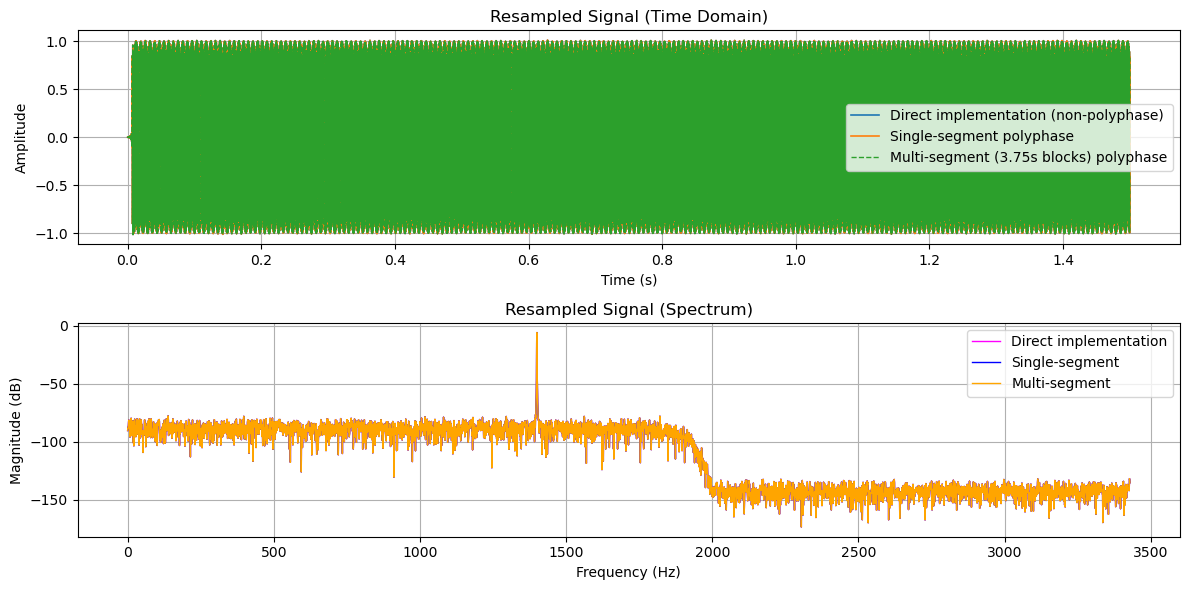

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from polyphase_decimate_causal import polyphase_decimate_causal

# Parameters
decim_rate = 7               # Decimation factor
fs_out = fs // decim_rate    # Output sample rate
block_len_sec = 3.75         # Block length in seconds

# Derived sizes
N_total = len(signal)
block_len = int(block_len_sec * fs)

# Single-segment direct implementation
resampled_direct = lfilter(antialiasing_48K_coefficient, [1.0], signal.astype(float))     # causal FIR
resampled_direct = resampled_direct[::decim_rate]

# Single-segment reference
resampled_single, _ = polyphase_decimate_causal(in_sig=signal, dec_filter_h=antialiasing_48K_coefficient, dec_rate=decim_rate)

# Multi-segment over 3.75s blocks
resampled_blocks = []
final_cond = None
start = 0

while start < N_total:
    end = min(start + block_len, N_total)
    block = signal[start:end]

    resampled, final_cond = polyphase_decimate_causal(
        in_sig=block,
        dec_filter_h=antialiasing_48K_coefficient,
        dec_rate=decim_rate,
        init_cond=final_cond
    )
    resampled_blocks.append(resampled)
    start = end

resampled_multi = np.concatenate(resampled_blocks)

# Calculate error between the two implementations
L = min(len(resampled_single), len(resampled_direct))
error = resampled_single[:L] - resampled_direct[:L]
error_norm = np.linalg.norm(error)
print(f"‖resampled_single - resampled_direct‖₂ = {error_norm:.6e}")

L = min(len(resampled_multi), len(resampled_direct))
error = resampled_multi[:L] - resampled_direct[:L]
error_norm = np.linalg.norm(error)
print(f"‖resampled_multi - resampled_direct‖₂ = {error_norm:.6e}")

L = min(len(resampled_multi), len(resampled_single))
error = resampled_multi[:L] - resampled_single[:L]
error_norm = np.linalg.norm(error)
print(f"‖resampled_multi - resampled_single‖₂ = {error_norm:.6e}")

# Plotting
t_out_direct = np.arange(len(resampled_direct)) / fs_out
t_out_single = np.arange(len(resampled_single)) / fs_out
t_out_multi = np.arange(len(resampled_multi)) / fs_out

plt.figure(figsize=(12, 6))

# Time-domain
plt.subplot(2, 1, 1)
plt.plot(t_out_direct, resampled_direct, label='Direct implementation (non-polyphase)', linewidth=1.2)
plt.plot(t_out_single, resampled_single, label='Single-segment polyphase', linewidth=1.2)
plt.plot(t_out_multi, resampled_multi, '--', label='Multi-segment (3.75s blocks) polyphase', linewidth=1.0)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Resampled Signal (Time Domain)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plot_spectrum(resampled_direct, fs_out, 'Direct implementation', 'magenta')
plot_spectrum(resampled_single, fs_out, 'Single-segment', 'blue')
plot_spectrum(resampled_multi, fs_out, 'Multi-segment', 'orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Resampled Signal (Spectrum)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
len(signal)

72000

In [6]:
len(antialiasing_48K_coefficient)

653